In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import time
sb.set()

<p>Let's see some generic data on bitcoin, some factors which may possible affect and determine it's price.</p>

In [3]:
bitcoin_data = pd.read_csv('./Assets/Bitcoin_data (2).csv')

In [4]:
bitcoin_data.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),activeAddresses,generatedCoins,cumulative total number of coins,fees,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,9/1/2009,NaN,NaN,0,NaN,NaN,NaN,14,700.0,700.0,0.0,1.0,NaN,NaN,NaN,3010,14
1,10/1/2009,NaN,NaN,0,NaN,NaN,NaN,61,3050.0,3750.0,0.0,1.0,NaN,NaN,NaN,13129,61
2,11/1/2009,NaN,NaN,0,NaN,NaN,NaN,93,4650.0,8400.0,0.0,1.0,NaN,NaN,NaN,20033,93
3,12/1/2009,NaN,NaN,7,NaN,NaN,NaN,102,4700.0,13100.0,0.0,1.0,5.0,NaN,0.0,22031,94
4,13/1/2009,NaN,NaN,0,NaN,NaN,NaN,123,6150.0,19250.0,0.0,1.0,NaN,NaN,NaN,26527,123


In [14]:
bitcoin_data.tail()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),activeAddresses,generatedCoins,cumulative total number of coins,fees,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
3600,13/10/2018,2.686031e+09,1.464480e+09,204956,1.090000e+11,6278.08,3.064030e+09,573912,1762.5,17381996.04,13.284765,7.450000e+12,300453.0,139.511870,0.000015,121545129,141
3601,14/10/2018,2.729400e+09,1.514088e+09,191145,1.090000e+11,6288.49,3.085320e+09,524084,1425.0,17383421.04,12.417850,7.450000e+12,281611.0,135.317929,0.000017,109132438,114
3602,15/10/2018,5.907321e+09,3.342051e+09,266783,1.090000e+11,6292.64,7.370770e+09,699171,2025.0,17385446.04,23.096020,7.450000e+12,387215.0,163.023739,0.000022,152889275,162
3603,16/10/2018,4.373732e+09,2.424904e+09,257832,1.140000e+11,6601.41,4.074800e+09,678723,1687.5,17387133.54,19.319427,7.450000e+12,364796.0,169.961882,0.000023,143946965,135
3604,17/10/2018,4.446638e+09,2.239410e+09,260224,1.140000e+11,6590.52,4.088420e+09,673361,1725.0,17388858.54,18.850080,7.450000e+12,361250.0,185.016195,0.000023,144790677,138


<p>Let's see all the available columns clearly</p>

In [9]:
for col in bitcoin_data.columns:
    print(col)

date
txVolume(USD)
adjustedTxVolume(USD)
txCount
marketcap(USD)
price(USD)
exchangeVolume(USD)
activeAddresses
generatedCoins
cumulative total number of coins
fees
averageDifficulty
paymentCount
medianTxValue(USD)
medianFee
blockSize
blockCount


In [10]:
bitcoin_hashrate = pd.read_csv("./Assets/BCHAIN-HRATE.csv")

In [11]:
bitcoin_hashrate.head()

,Date,Value
0,1/5/2013,72.128914
1,2/5/2013,73.631600
2,3/5/2013,73.631600
3,4/5/2013,77.137866
4,5/5/2013,81.645923


<p>Given the myriad factors possible related to bitcoin, we are interested in factors which will affect its price, the factors which the price of bitcoin is dependent upon, not the factors which depend on the price of bitcoin. </p>

<table>
    <tr>
        <th>blockCount</th>
        <td>A factor which measures the number of transactions or (blocks) in the blockchain</td>
    </tr>
    <tr>
        <th>blockSize</th>
        <td>A factor which measures how many transactions a block can store, the size of the block, which affects its scalability</td>
    </tr>
    <tr>
        <th>averageDifficulty</th>
        <td>How much reward in bitcoin is paid to the miners. </td>
    </tr>
    <tr>
        <th>Hashrate</th>
        <td>The computational power that the bitcoin network currently has (provided by the miners) to solve nounces to earn Bitcoin rewards</td>
    </tr>
    <tr>
        <th>Active Addresses</th>
        <td>The number of wallets containing bitcoin</td>
    </tr>
    <tr>
        <th>Cumulative coins</th>
        <td>The total number of Bitcoins</td>
    </tr>

</table>

<p>
    Let's observe the trend of bitcoin over time. Here, we are using:
    <ul>
        <li>Price per Bitcoin</li>
        <li>Active Addresses</li>
    </ul>
</p>

<p>
We have chosen these variables because these factors strongly reflect the sentiment of investors to Bitcoin intuitively
</p>

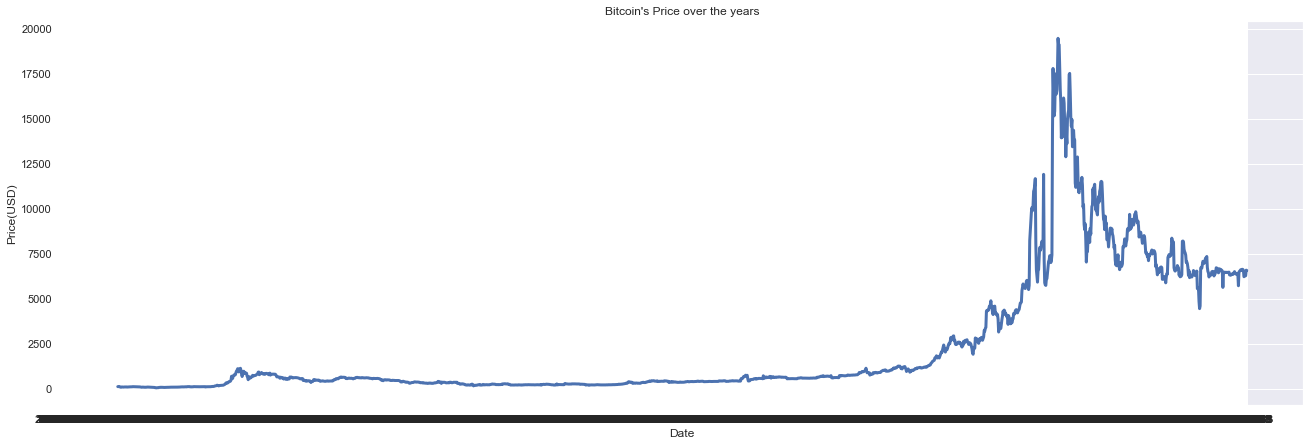

In [27]:
fig = plt.figure(figsize = (24,12))

plt.plot(bitcoin_data["date"], bitcoin_data["price(USD)"], label = "Price of Bitcoin", linewidth = 3)
# plt.plot(bitcoin_hashrate["Date"], bitcoin_hashrate["Value"], label = "Hashrate of Bitcoin", linewidth = 3)

plt.title("Bitcoin's Price over the years")
font = {'size' : 200}
plt.rc('font', **font)
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.tight_layout()
plt.show()

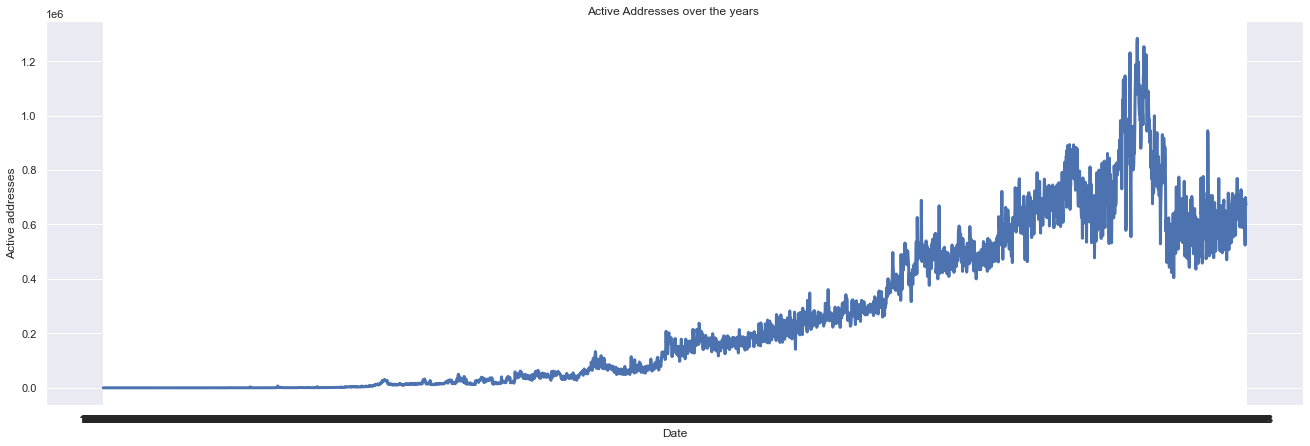

In [28]:
fig = plt.figure(figsize = (24,12))

plt.plot(bitcoin_data["date"], bitcoin_data["activeAddresses"], label = "Price of Bitcoin", linewidth = 3)
# plt.plot(bitcoin_hashrate["Date"], bitcoin_hashrate["Value"], label = "Hashrate of Bitcoin", linewidth = 3)

plt.title("Active Addresses over the years ")
font = {'size' : 200} 
plt.rc('font', **font)
plt.xlabel('Date')
plt.ylabel("Active addresses")
plt.tight_layout()
plt.show()

<p>
Very clearly, cryptocurrency is a rising trend because there is an increase in price due to the growth in demand, as shown by the absurd increases in activeWallet Addresses</p>

<p>Now, let's find out which data label we can use, that have a strong relationship with bitcoin's price</p>
<p>
Based on the definition of various labels, we suspect that the following should have a strong relationship with it's price: 
<ul>
    <li>Average Difficulty. If it is more difficult to get Bitcoin, it makes it more scarce right? Should have an direct relationship?</li>
    <li>Hashrate. The more miners there are, the supply of Bitcoin increases, Hence, should reflect an inverse relationship?</li>
    <li>BlockSize. The greater the number of transactions a block can store, the stronger Bitcoin is able to act as a payment method right?</li>
    <li>Cumulative Number of Coins. The greater the supply, the lower the price should be. Yes?</li>
</ul>
</p>

<p>Let's see the relationship between each variable so we can decide better which variable to use.</p>

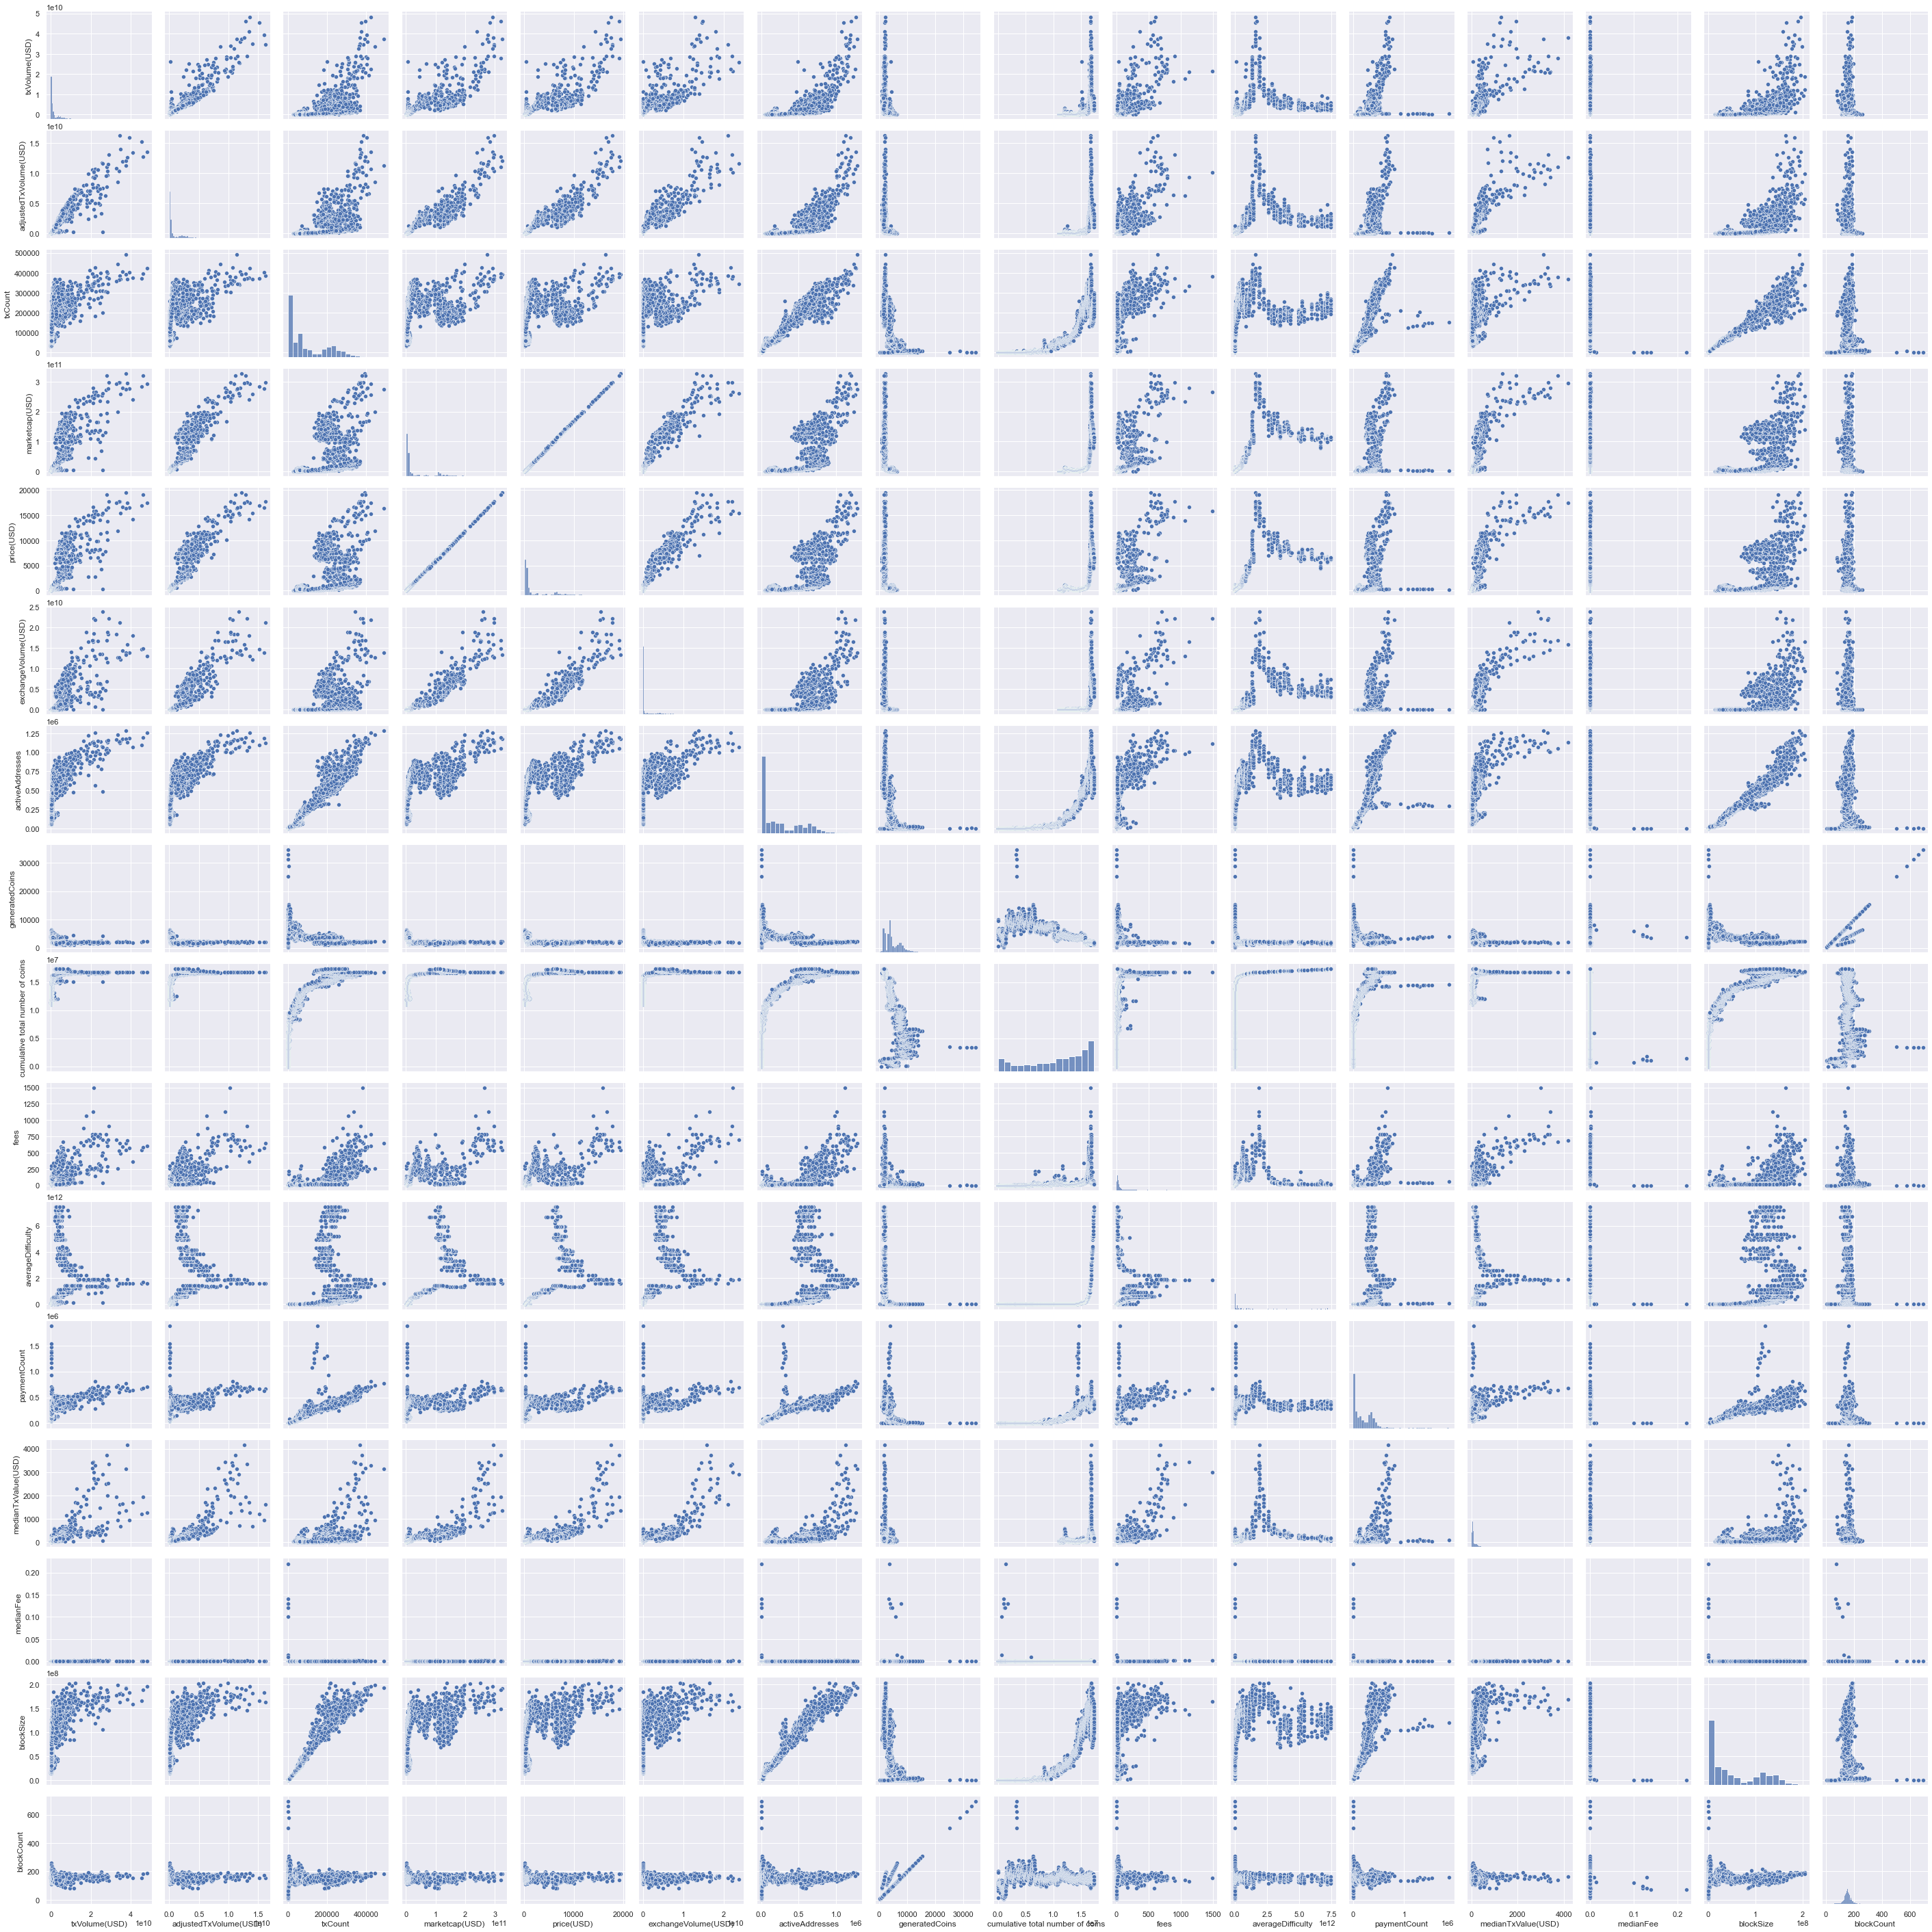

In [21]:
sb.pairplot(data = bitcoin_data)

<p>Woops, it looks like we have so much variables, that a pairplot would not do it. This tells us very little and makes it very hard for us to really carefully scrutinize any trends. Let's try a heatmap. </p>

<AxesSubplot:>

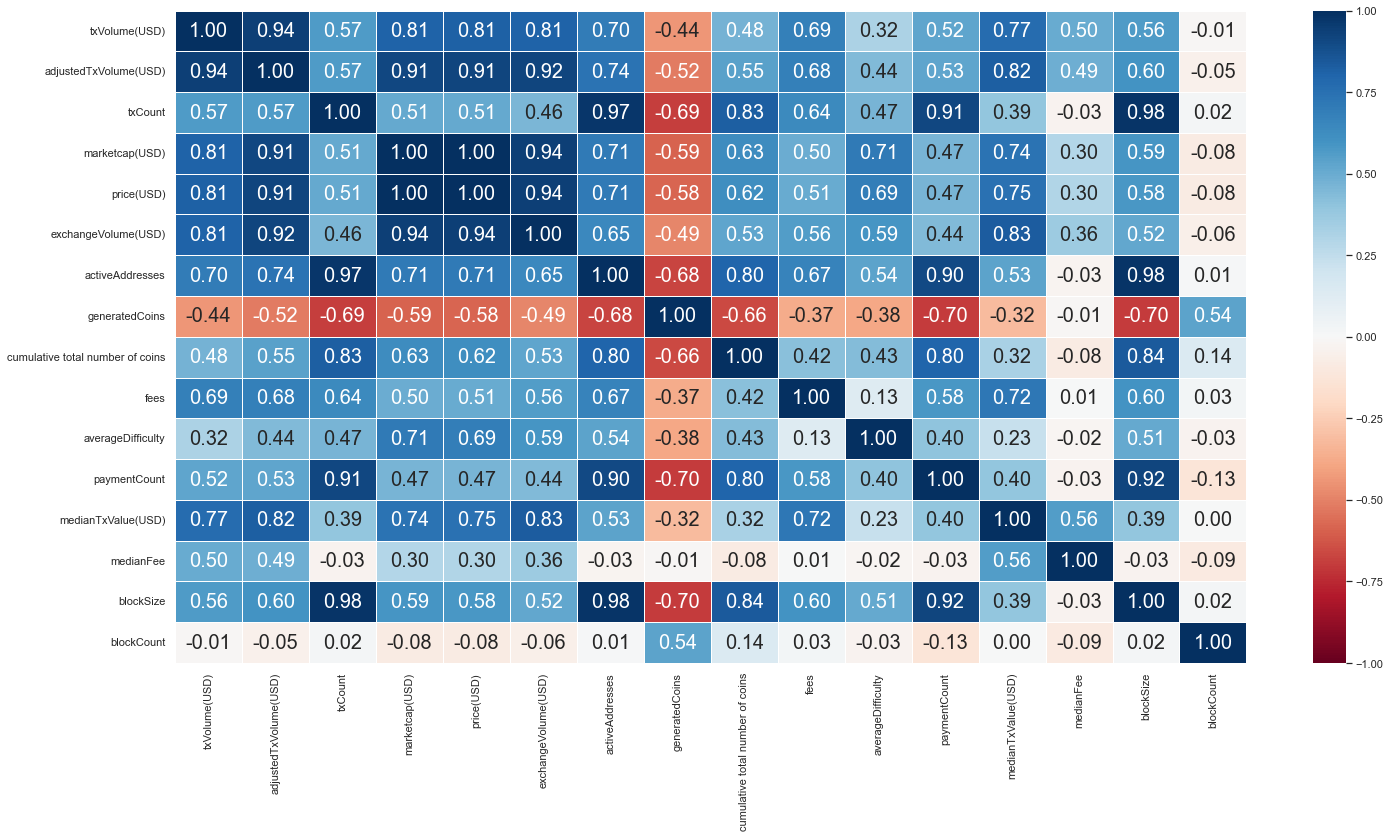

In [20]:
f = plt.figure(figsize=(24, 12))
sb.heatmap(bitcoin_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 20}, cmap = "RdBu")

<p>Zooming down on the horizontal Price(USD) variable. Since we are interested in factors the price of Bitcoin is dependent upon. 
The following have little to no correlation, or weaker correlation in general: 
    <ul>
        <li>blockCount</li>
        <li>blockSize</li>
        <li>MedianFee</li>
        <li>MedianTxValue(USD)</li>
        <li>generatedCoins</li>
        <li>PaymentCount</li>
        <li>Fees</li>
    </ul>
    Although Transaction Volume has a good correlation, Volume is not a reliable data because it can be faked. Because of various factors such as:
    <ul>
        <li>A trader colluding with an exchange</li>
        <li>A trader colluding with another trader</li>
        <li>The use of high-frequency trading algorithms</li>
    </ul>
    Thus, we have chosen to narrow down our scope to:
    <ul>
        <li>Average difficulty</li>
        <li>Daily Hashrate</li>
        <li>Cumulative Number of Coins</li>
        <li>Active Addresses</li>
    </ul>
    <b>Now, let's move onto data cleaning!</b>
</p>

